In [19]:
import numpy as np
from graphviz import Digraph

In [20]:
class Value:
    def __init__ (self, data, _children = (), _op = "", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
    
    def __add__ (self, other):
        outVal = Value(self.data * other.data, (self, other), "+")
        print("Llds")
        return outVal
    
    def __mul__ (self, other):
        outVal = Value(self.data * other.data, (self, other), "*")
        return outVal
    
    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2, label="a")
b = Value(3, label="b")
c = a*b; c.label = "c"
c, c._prev, c._op

(Value(data=6), {Value(data=2), Value(data=3)}, '*')

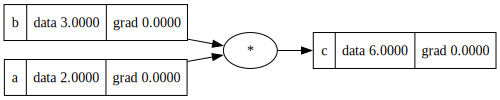

In [21]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s| data %.4f | grad %.4f }" % (n.label,n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

draw_dot(c)

Llds


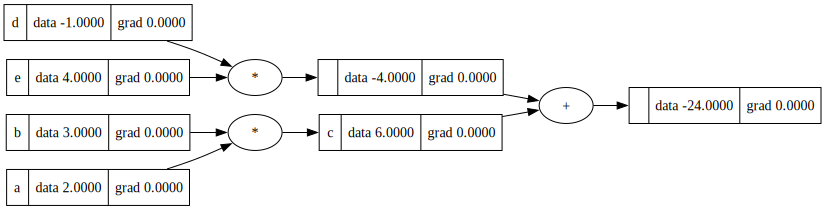

In [23]:
d = Value(-1, label = "d")
e = Value(4, label = "e")
f = d*e
L = f + c
draw_dot(L)
